<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/MX-Project/blob/main/code/MX_2_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import itertools
# Setting seed for reproducibility
np.random.seed(1234)
PYTHONHASHSEED = 0

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, LSTM,BatchNormalization,TimeDistributed,Flatten,Bidirectional
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd


In [ ]:
df_bands_baseline = pd.read_csv('/content/drive/MyDrive/MX_2/EEG/3. Features/Baseline_Frequncy_Bands_Features.csv')
df_bands_impasse = pd.read_csv('/content/drive/MyDrive/MX_2/EEG/3. Features/Impasse_Frequncy_Bands_Features.csv')
df_bands_aha = pd.read_csv('/content/drive/MyDrive/MX_2/EEG/3. Features/Aha_Frequncy_Bands_Features.csv')
df_attention = pd.read_csv('/content/drive/MyDrive/MX_2/EEG/3. Features/Sub_46_61_Training_Frequncy_Bands_Features_Attention.csv')

In [ ]:
df_bands_baseline['label']=0
df_bands_impasse['label']=1
df_bands_aha['label']=2
df_attention['label']=3

data_all = pd.concat([df_bands_baseline, df_bands_impasse, df_bands_aha, df_attention])

# Assuming 'data' is your DataFrame
if 'Cluster' in data_all.columns:
  data_all = data_all.drop('Cluster', axis=1)

# prompt: print lengh of labls = 0, 1, 2, 3
# Check the lengths of each label after removal
print(len(data_all[data_all['label'] == 0]))
print(len(data_all[data_all['label'] == 1]))
print(len(data_all[data_all['label'] == 2]))
print(len(data_all[data_all['label'] == 3]))

28125
5000
1875
226293


In [ ]:
df_all.columns

Index(['delta', 'theta', 'sigma', 'beta', 'mid_beta', 'high_beta', 'low_gamma',
       'theta/beta', 'label'],
      dtype='object')

In [ ]:
data = pd.concat([df_bands_baseline.iloc[0:,:-1],df_bands_impasse.iloc[0:,:-1],df_bands_aha.iloc[0:,:-1],df_attention.iloc[0:,:-1]])
labels = pd.concat([df_bands_baseline.iloc[:,-1],df_bands_impasse.iloc[:,-1],df_bands_aha.iloc[:,-1],df_attention.iloc[:,-1]])

In [ ]:
# prompt: randomly remove rows from df_all, make sure have the same length for df_all[label] = 0, 1,2,3

def randomly_remove_rows(df_all):
  """Randomly removes rows from df_all while maintaining equal lengths for each label."""
  label_counts = df_all['label'].value_counts()
  min_count = label_counts.min()
  new_df_all = pd.DataFrame()
  for label in df_all['label'].unique():
    df_label = df_all[df_all['label'] == label]
    df_label_sample = df_label.sample(n=min_count, random_state=42)
    new_df_all = pd.concat([new_df_all, df_label_sample])
  return new_df_all

# Apply the function to your dataframe
df_all = randomly_remove_rows(data_all)

# Verify that the lengths for each label are now equal
print(len(df_all[df_all['label'] == 0]))
print(len(df_all[df_all['label'] == 1]))
print(len(df_all[df_all['label'] == 2]))
print(len(df_all[df_all['label'] == 3]))

1875
1875
1875
1875


In [ ]:
df_all.to_csv('/content/drive/MyDrive/MX_2/EEG/3. Features/Baseline_Impasse_Aha_Attention_Frequncy_Bands_Features.csv', index=False)

RandomForestClassifier(random_state=42)


Results for label 0:
Confusion Matrix:
[[1047   44]
 [  69  340]]
Accuracy: 0.9246666666666666
F1-score: 0.8575031525851198
Precision: 0.8854166666666666
Recall: 0.8312958435207825


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

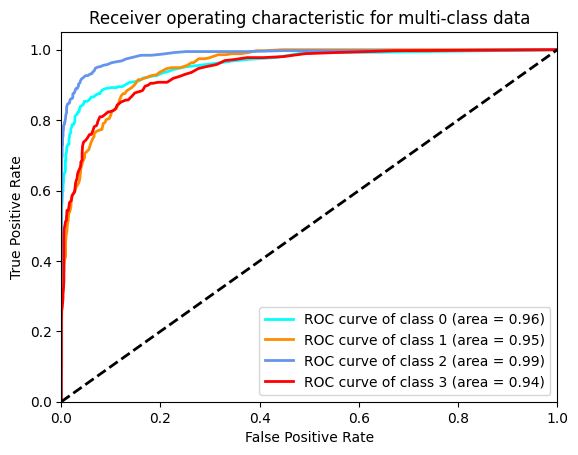


Results for label 1:
Confusion Matrix:
[[1040  107]
 [  67  286]]
Accuracy: 0.884
F1-score: 0.7667560321715817
Precision: 0.727735368956743
Recall: 0.8101983002832861


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

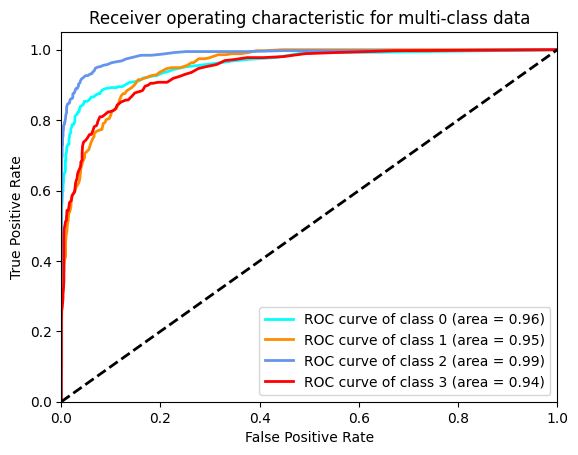


Results for label 2:
Confusion Matrix:
[[1090   29]
 [  50  331]]
Accuracy: 0.9473333333333334
F1-score: 0.893387314439946
Precision: 0.9194444444444444
Recall: 0.868766404199475


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

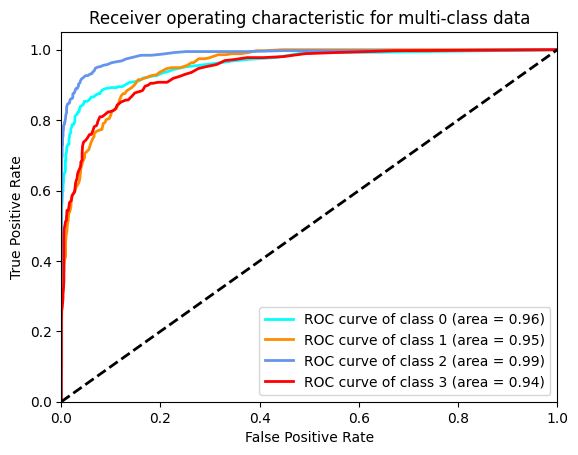


Results for label 3:
Confusion Matrix:
[[1063   80]
 [  74  283]]
Accuracy: 0.8973333333333333
F1-score: 0.7861111111111111
Precision: 0.7796143250688705
Recall: 0.7927170868347339


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

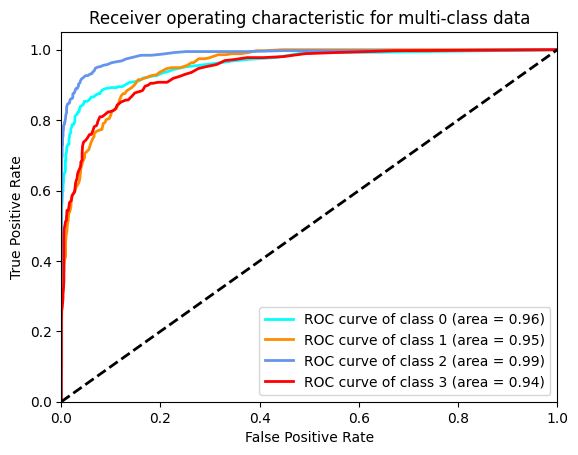

In [ ]:
# prompt: use random foreast classify df_all, for label = 0, 1, 2, 3, print confusion matrix and accuracy, F1 score, percision, recall, ploc ROC curve

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming df_all is your DataFrame with features and labels

X = df_all.drop('label', axis=1)
y = df_all['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier for each label
for label in [0, 1, 2, 3]:
    print(f"\nResults for label {label}:")

    # Filter predictions and true labels for the current label
    y_test_label = (y_test == label).astype(int)
    y_pred_label = (y_pred == label).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_label, y_pred_label)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_label, y_pred_label)
    print("Accuracy:", accuracy)

    # Calculate F1-score, precision, and recall
    f1 = f1_score(y_test_label, y_pred_label)
    precision = precision_score(y_test_label, y_pred_label)
    recall = recall_score(y_test_label, y_pred_label)
    print("F1-score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)

    # ROC Curve (Only if more than 2 classes)
    if len(df_all['label'].unique()) > 2:
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
        y_score = rf_classifier.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(df_all['label'].unique())):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        lw = 2
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
        for i, color in zip(range(len(df_all['label'].unique())), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)


Results for label 0:
Confusion Matrix:
[[1050   41]
 [  69  340]]
Accuracy: 0.9266666666666666
F1-score: 0.8607594936708861
Precision: 0.8923884514435696
Recall: 0.8312958435207825


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

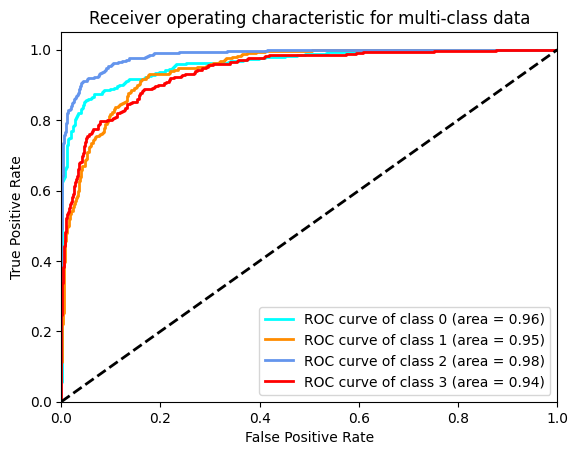


Results for label 1:
Confusion Matrix:
[[1035  112]
 [  65  288]]
Accuracy: 0.882
F1-score: 0.7649402390438247
Precision: 0.72
Recall: 0.8158640226628895


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

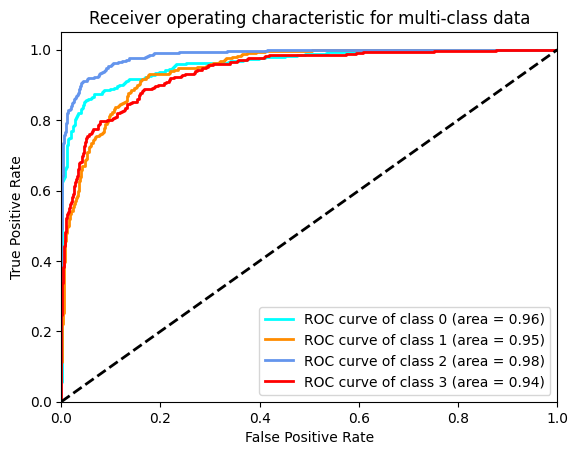


Results for label 2:
Confusion Matrix:
[[1087   32]
 [  53  328]]
Accuracy: 0.9433333333333334
F1-score: 0.8852901484480432
Precision: 0.9111111111111111
Recall: 0.8608923884514436


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

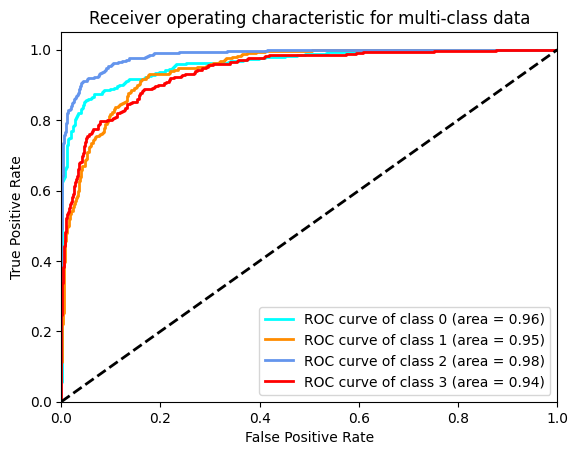


Results for label 3:
Confusion Matrix:
[[1063   80]
 [  78  279]]
Accuracy: 0.8946666666666667
F1-score: 0.7793296089385475
Precision: 0.7771587743732591
Recall: 0.7815126050420168


<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for multi-class data')

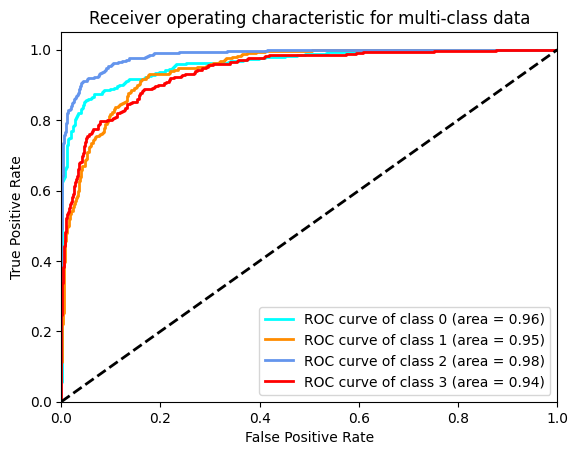

In [ ]:
# prompt: use XGBoost classify df_all, for label = 0, 1, 2, 3, print confusion matrix and accuracy, F1 score, percision, recall, ploc ROC curve

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=4, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier for each label
for label in [0, 1, 2, 3]:
    print(f"\nResults for label {label}:")

    # Filter predictions and true labels for the current label
    y_test_label = (y_test == label).astype(int)
    y_pred_label = (y_pred == label).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_label, y_pred_label)
    print("Confusion Matrix:")
    print(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_label, y_pred_label)
    print("Accuracy:", accuracy)

    # Calculate F1-score, precision, and recall
    f1 = f1_score(y_test_label, y_pred_label)
    precision = precision_score(y_test_label, y_pred_label)
    recall = recall_score(y_test_label, y_pred_label)
    print("F1-score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)

    # ROC Curve (Only if more than 2 classes)
    if len(df_all['label'].unique()) > 2:
        y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
        y_score = xgb_classifier.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(df_all['label'].unique())):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        lw = 2
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
        for i, color in zip(range(len(df_all['label'].unique())), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:

labels=np.array(labels)
labels=labels.reshape((labels.shape[0],1))
labels.shape
# labels.head()
labels=pd.DataFrame(labels)
labels.head()
data.head()
def create_set(da, lab, window):
    seq, seq_lab=[],[]
    for k in range(0, len(da)-window, 20):
        q=lab.iloc[k:k+window]
        val=np.unique(q)
        if(len(val)==1):
            seq.append(np.array(da.iloc[k:k+window]))
#             print(f'sequence created with shape {np.array(seq).shape}')
            seq_lab.append(np.array(lab.iloc[k, 0]))
#             print(f'label appended {lab.iloc[k, 0]}')

    return seq, seq_lab
window=32
seq, seq_labels=create_set(data, labels, window)
X = np.asarray(seq).astype(np.float32)
Y = np.asarray(seq_labels)
X.shape
Y.shape
Y=Y.reshape(Y.shape[0],1)
Y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, train_size=0.80, shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_train,return_counts=True)
np.unique(y_test,return_counts=True)
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from tensorflow.python.keras.optimizers import *
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

#from keras.optimizers import RMSprop
#from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras import regularizers

# from tensorflow.python.keras.layers import Input, GRU, Dense
from tensorflow.python.keras.models import Model
nb_features = x_train.shape[2]
nb_out = 1

model = Sequential()

model.add(LSTM( units=32,return_sequences=True,input_shape=(window, nb_features)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM( units=16,turn_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=8,activation='sigmoid'))
model.add(Dense(units=nb_out, activation='sigmoid'))
Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
callback = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train,validation_split=0.2,epochs=30, batch_size=32,verbose=1,callbacks=[callback])
Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(x_test, y_test, verbose=1, batch_size=32)
scores[1]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig('confusion_matrix_LSTM_theta.png',bbox_inches='tight')
# test metrics
probab= model.predict(x_test, verbose=2,batch_size=32)
print(f'shape: {probab.shape}')

# make predictions and compute confusion matrix

def predict_classes(probab, batch_size=32, verbose=1):
    if probab.shape[-1] > 1:
        return probab.argmax(axis=-1)
    else:
        return (probab > 0.5).astype('int32')
y_true_test = y_test
y_pred_test = predict_classes(probab)
# Plot non-normalized confusion matrix
## CM WITH 30 EPOCHS
class_names=['Healthy','Stressed']
plt.figure()
plot_confusion_matrix(cm_test, classes=class_names,
                      title='Confusion matrix')
plt.show()